In [1]:
!pip install category_encoders

In [2]:
!pip install -U scikit-learn==0.24.2

In [3]:
# Importando as bibliotecas para análise de dados
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Aumentando a quantidade de visualização de linhas e colunas
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df= pd.read_csv('/content/drive/My Drive/base.csv', sep = ',', encoding='UTF-8',
             header = 0, index_col=0)

In [6]:
# Removendo warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Visualizando o dataset
df.head()

,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Análise Exploratória: First Contact

In [8]:
# Avaliando a média de dados nulos em relação à base
df.isnull().mean()*100

ClasseImovel             0.000000
ClasseZona               0.000000
Fachada                 17.739726
TamanhoLote              0.000000
Rua                      0.000000
Beco                    93.767123
FormaProp                0.000000
PlanoProp                0.000000
Servicos                 0.000000
ConfigLote               0.000000
InclinacaoLote           0.000000
Bairro                   0.000000
Estrada1                 0.000000
Estrada2                 0.000000
TipoHabitacao            0.000000
EstiloHabitacao          0.000000
Qualidade                0.000000
Condicao                 0.000000
AnoConstrucao            0.000000
AnoReforma               0.000000
TipoTelhado              0.000000
MaterialTelhado          0.000000
Exterior1                0.000000
Exterior2                0.000000
TipoAlvenaria            0.547945
AreaAlvenaria            0.547945
QualidadeCobertura       0.000000
CondicaoExterna          0.000000
TipoFundacao             0.000000
AlturaPorao   

In [9]:
# Analisando tipagem dos dados e missings
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ClasseImovel          1460 non-null   int64  
 1   ClasseZona            1460 non-null   object 
 2   Fachada               1201 non-null   float64
 3   TamanhoLote           1460 non-null   int64  
 4   Rua                   1460 non-null   object 
 5   Beco                  91 non-null     object 
 6   FormaProp             1460 non-null   object 
 7   PlanoProp             1460 non-null   object 
 8   Servicos              1460 non-null   object 
 9   ConfigLote            1460 non-null   object 
 10  InclinacaoLote        1460 non-null   object 
 11  Bairro                1460 non-null   object 
 12  Estrada1              1460 non-null   object 
 13  Estrada2              1460 non-null   object 
 14  TipoHabitacao         1460 non-null   object 
 15  EstiloHabitacao      

In [10]:
# Valores faltantes em termos absolutos 
df.isnull().sum()

ClasseImovel               0
ClasseZona                 0
Fachada                  259
TamanhoLote                0
Rua                        0
Beco                    1369
FormaProp                  0
PlanoProp                  0
Servicos                   0
ConfigLote                 0
InclinacaoLote             0
Bairro                     0
Estrada1                   0
Estrada2                   0
TipoHabitacao              0
EstiloHabitacao            0
Qualidade                  0
Condicao                   0
AnoConstrucao              0
AnoReforma                 0
TipoTelhado                0
MaterialTelhado            0
Exterior1                  0
Exterior2                  0
TipoAlvenaria              8
AreaAlvenaria              8
QualidadeCobertura         0
CondicaoExterna            0
TipoFundacao               0
AlturaPorao               37
CondicaoPorao             37
ParedePorao               38
TipoAcabPorao1            37
AreaAcabPorao1             0
TipoAcabPorao2

## Visualização Gráfica de valores faltantes

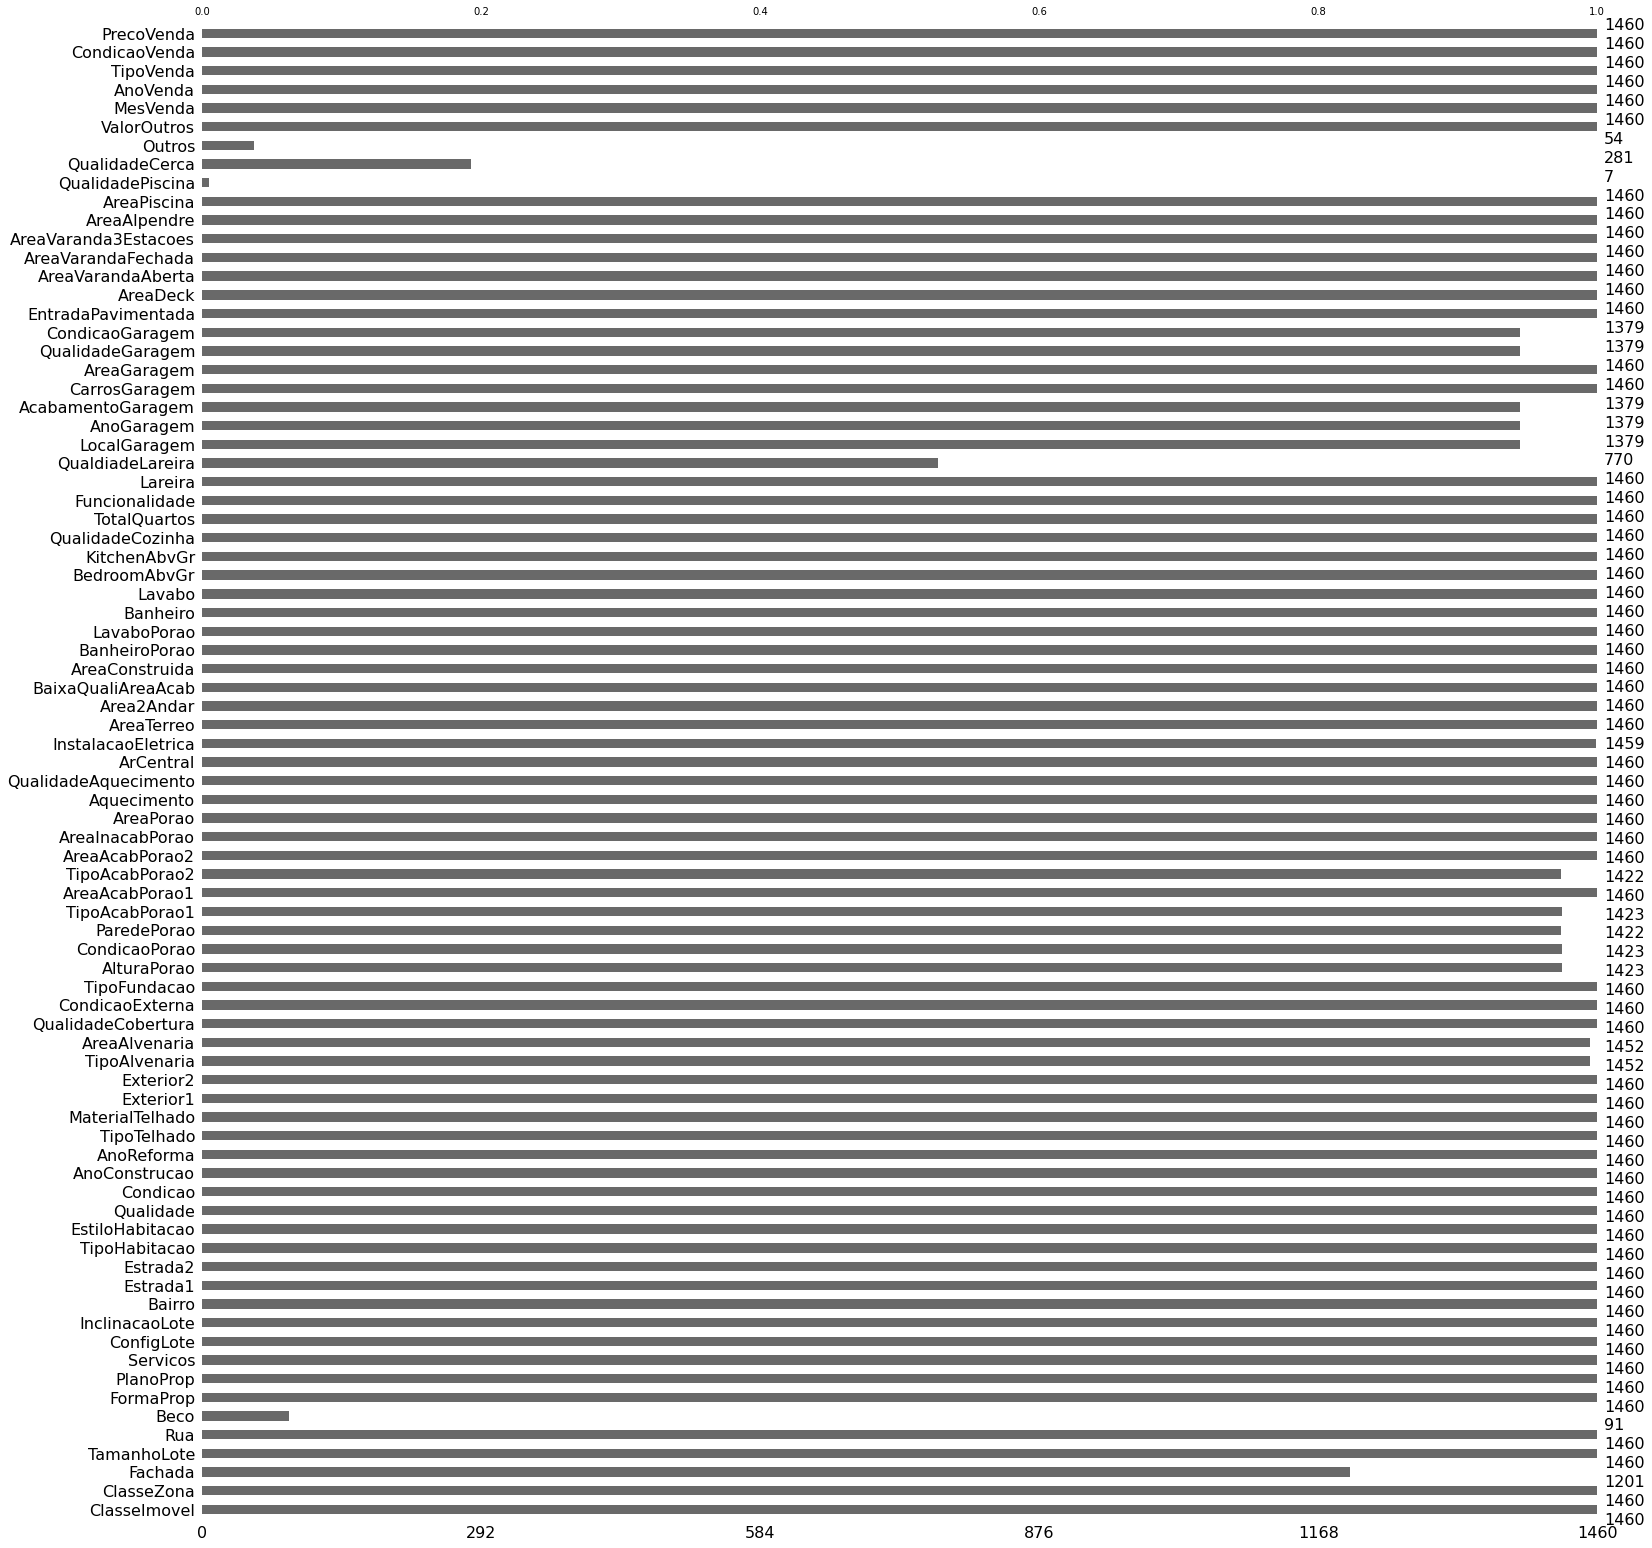

In [11]:
import missingno as msno
msno.bar((df))
plt.show()

In [12]:
# Sumário estatísticos das features numéricas
df.describe(percentiles = [.25, .5, .75, .95, .99]).round(2)

,ClasseImovel,Fachada,TamanhoLote,Qualidade,Condicao,AnoConstrucao,AnoReforma,AreaAlvenaria,AreaAcabPorao1,AreaAcabPorao2,AreaInacabPorao,AreaPorao,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,TotalQuartos,Lareira,AnoGaragem,CarrosGaragem,AreaGaragem,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,PrecoVenda
count,1460.0,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.9,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,42.3,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,20.0,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.0,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,50.0,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,70.0,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
95%,160.0,107.00,17401.15,8.00,8.00,2007.00,2007.00,456.00,1274.00,396.20,1468.00,1753.00,1831.25,1141.05,0.00,2466.10,1.00,1.00,2.00,1.00,4.00,1.00,10.00,2.00,2007.00,3.00,850.10,335.00,175.05,180.15,0.00,160.00,0.00,0.00,11.00,2010.00,326100.00
99%,190.0,141.00,37567.64,10.00,9.00,2009.00,2009.00,791.92,1572.41,830.38,1797.05,2155.05,2219.46,1418.92,360.00,3123.48,2.00,1.00,3.00,1.00,5.00,2.00,11.00,2.00,2009.00,3.00,1002.79,505.46,285.82,261.05,168.00,268.05,0.00,700.00,12.00,2010.00,442567.01
max,190.0,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


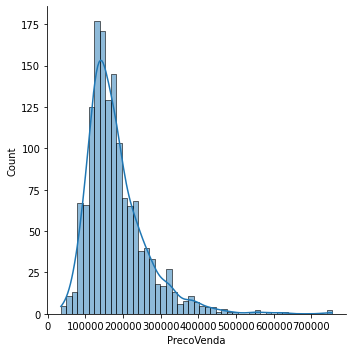

In [13]:
# Verificando a distribuição do preço de venda 
sns.displot(df, x="PrecoVenda", kde=True)

# Análise bivariada e multivariada

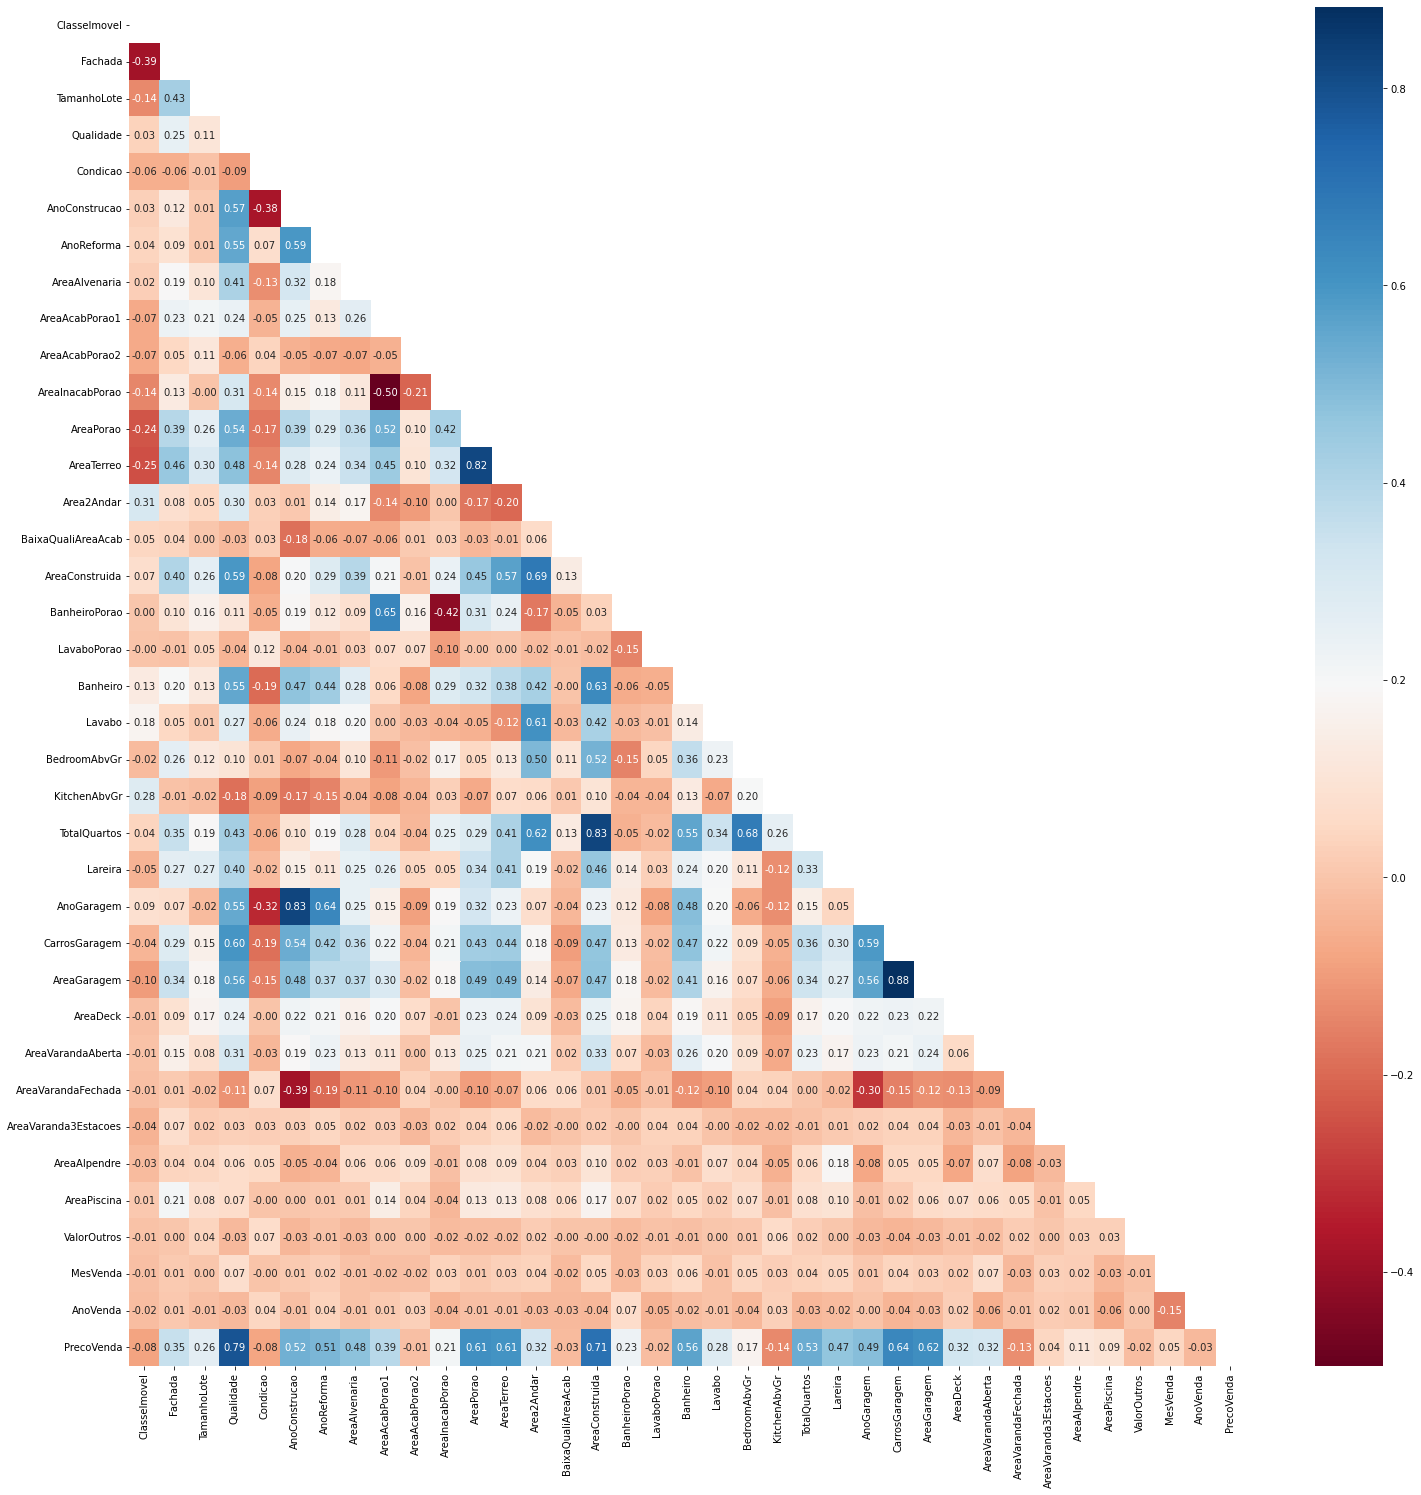

In [14]:
# Matriz de correlação entre as features númericas
sns.set_context(font_scale = 3.9)
plt.figure(figsize = (25,25))
sns.heatmap(
    df.corr(), #Fonte dos dados, nossa matriz de correlação.
    annot = True, #Anotar os valores das correlações nas caixinhas coloridas.
    fmt = ".2f", #Formato float de 2 dígitos, para arredondar os números.
    cmap = "RdBu", # Mapa de cores do vermelho (menor) para o azul (maior).
    mask = np.triu(np.ones_like(df.corr())) #Máscara para excluir a diagonal superior da matriz.
)

plt.show()

In [15]:
# Criação de uma lista com as variáveis com correlação positiva acima de 0,50
label_corr = ['Qualidade', 'AnoConstrucao', 'AreaPorao', 'AnoReforma', 'AreaAlvenaria', 'AreaConstruida', 'AreaTerreo', 'Banheiro', 'TotalQuartos', 
                  'Lareira', 'AnoGAragem', 'CarrosGaragem', 'AreaGaragem', 'TotalQuartos']

In [16]:
# Carregando um novo dataframe somente com as colunas de interesse
df2 = pd.read_csv('/content/drive/My Drive/base.csv', sep = ',', encoding='UTF-8',
             header = 0, index_col=0, usecols=['Qualidade', 'AnoConstrucao', 'AreaPorao', 'AnoReforma', 'AreaAlvenaria', 'AreaConstruida', 'AreaTerreo', 'Banheiro', 'TotalQuartos', 
                  'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'TotalQuartos'])
# Forçando o heatmap a calcular correlação para numeros inteiros
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df2.select_dtypes(include=numerics)
corr = num_df.corr()

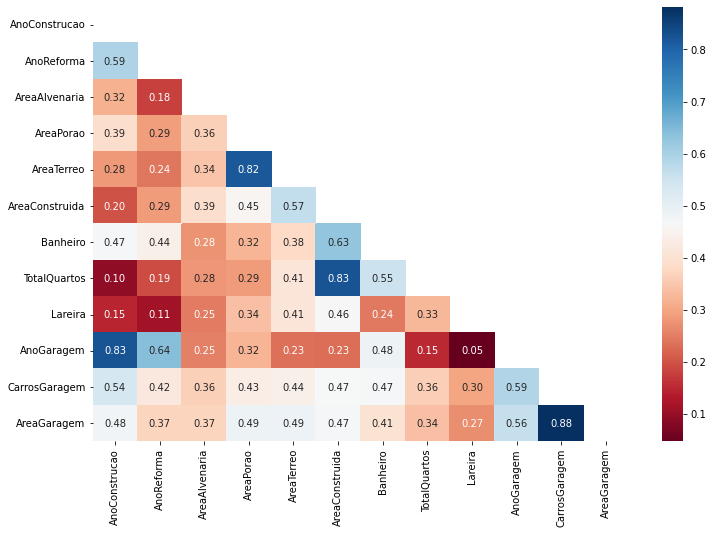

In [17]:
# Mapeando possíveis multicolinearidades entre as variáveis explicativas selecionadas
sns.set_context(font_scale = 3.9)
plt.figure(figsize = (12,8))
sns.heatmap(
    df2.corr(), #Fonte dos dados, nossa matriz de correlação.
    annot = True, #Anotar os valores das correlações nas caixinhas coloridas.
    fmt = ".2f", #Formato float de 2 dígitos, para arredondar os números.
    cmap = "RdBu", # Mapa de cores do vermelho (menor) para o azul (maior).
    mask = np.triu(np.ones_like(df2.corr())) #Máscara para excluir a diagonal superior da matriz.
)

plt.show()

In [18]:
# Função para construir scatter plots
def grafico_scatter_vc(data, variable, label):
    
    if label == "": label = variable
    plt.scatter(y="PrecoVenda", x=variable, data=data)
    plt.xlabel(label)
    plt.ylabel('PrecoVenda')
    plt.show()

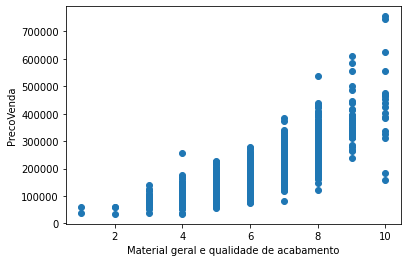

In [19]:
# Scatterplot para qualidade. Pode-se perceber uma forte tendência linear
grafico_scatter_vc(df.replace(label_corr), "Qualidade", "Material geral e qualidade de acabamento")

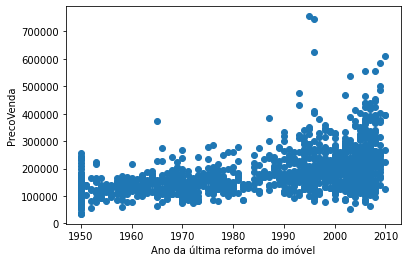

In [20]:
grafico_scatter_vc(df.replace(label_corr), "AnoReforma", "Ano da última reforma do imóvel")

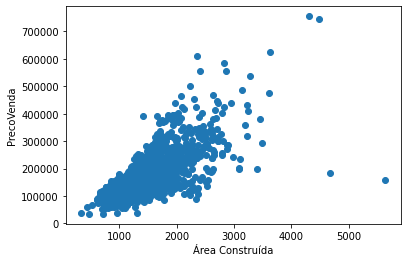

In [21]:
# Scatterplot para area construída e preço de venda. Pode-se verificar a existência de dois imóveis 
# com área grande demais (>4 mil) e preço abaixo de 200 mil dólares
grafico_scatter_vc(df.replace(label_corr), "AreaConstruida", "Área Construída")

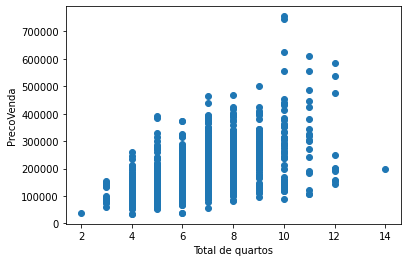

In [22]:
grafico_scatter_vc(df.replace(label_corr), "TotalQuartos", "Total de quartos")

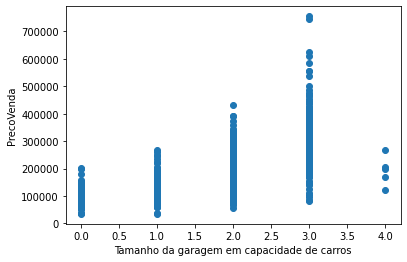

In [23]:
grafico_scatter_vc(df.replace(label_corr), "CarrosGaragem", "Tamanho da garagem em capacidade de carros")

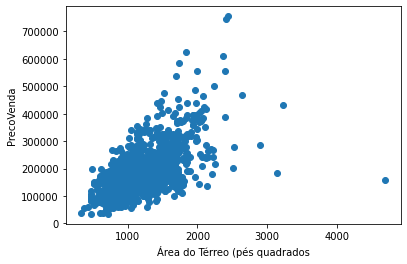

In [24]:
grafico_scatter_vc(df.replace(label_corr), "AreaTerreo", "Área do Térreo (pés quadrados")

In [25]:
# Criação de uma lista com as variáveis qualitativas consideradas mais relevantes 
label_quali = [['ClasseImovel', 'ClasseZona', 'Rua', 'Beco', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote',
               'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'Qualidade', 
               'Condicao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura',
               'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'ArCentral', 'QualidadeCozinha', 'Funcionalidade', 'LocalGaragem',
              'QualidadeCerca', 'Outros', 'TipoVenda', 'CondicaoVenda', 'QualdiadeLareira']]

In [26]:
# Função para construir gráfico bloxplot
def grafico_boxplot_pv(data, variable, label):
    
    if label == "": label = variable
    sns.boxplot(y="PrecoVenda", x=variable, data=df)
    plt.ylabel(label)
    plt.show()

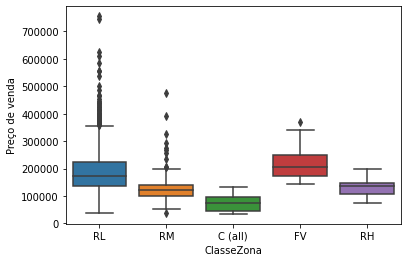

In [27]:
# Bloxlot para feature categórica
grafico_boxplot_pv(df.replace(label_corr), "ClasseZona", "Preço de venda")

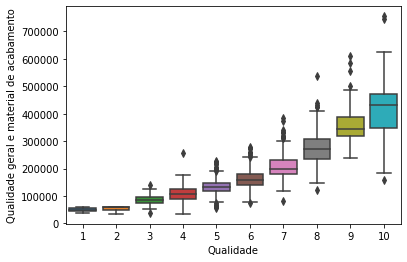

In [28]:
# Avaliando a relação da qualidade com a variável target
grafico_boxplot_pv(df.replace(label_quali), "Qualidade", "Qualidade geral e material de acabamento")

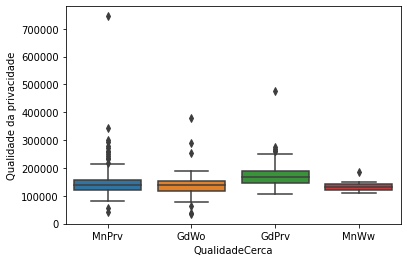

In [29]:
# Avaliando a relação da privacidade com a variável target
grafico_boxplot_pv(df.replace(label_quali), "QualidadeCerca", "Qualidade da privacidade")

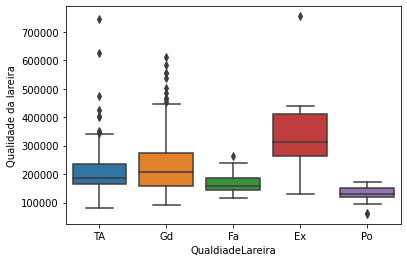

In [30]:
# Avaliando a relação da qualidade da lareira com a variável target
grafico_boxplot_pv(df.replace(label_quali), "QualdiadeLareira", "Qualidade da lareira")

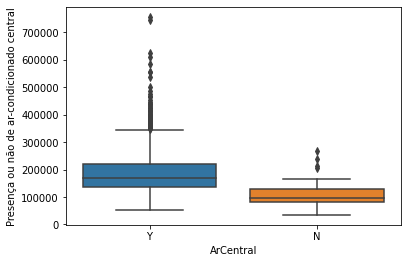

In [31]:
# Avaliando a relação da presença de ar-condicionado central com a variável target
grafico_boxplot_pv(df.replace(label_quali), "ArCentral", "Presença ou não de ar-condicionado central")

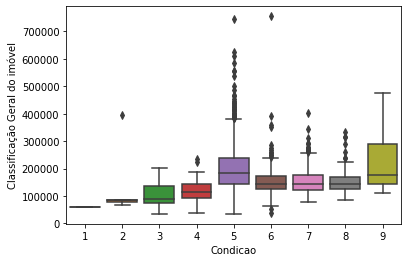

In [32]:
# Avaliando a condição da casa
grafico_boxplot_pv(df.replace(label_quali), "Condicao", "Classificação Geral do imóvel")

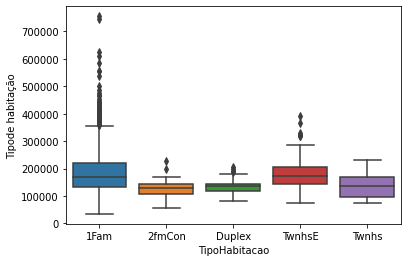

In [33]:
grafico_boxplot_pv(df.replace(label_quali), "TipoHabitacao", "Tipode habitação")

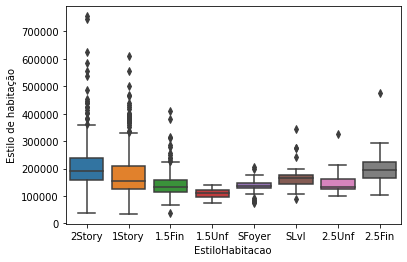

In [34]:
grafico_boxplot_pv(df.replace(label_quali), "EstiloHabitacao", "Estilo de habitação")

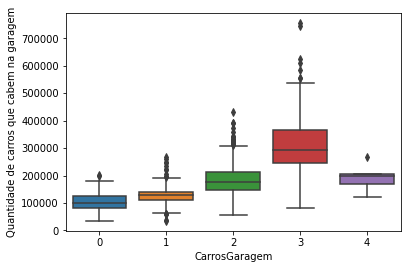

In [35]:
grafico_boxplot_pv(df.replace(label_quali), "CarrosGaragem", "Quantidade de carros que cabem na garagem")

In [36]:
# Boxplot para bairro
import plotly.express as px
fig = px.box(df, x= 'PrecoVenda', y='Bairro')
fig.show()

### Conclusões pós-EDA
##### 1) As variáveis que possuem forte correlação posivita com o preço de venda são: ano de construção do imóvel, qualidade geral dos materiais, condição, ano de reforma, quantidade de carros na garagem, área construída e total de quartos
##### 2) A capacidade da garagem em número de carros apontou para uma diferença de 200 mil no boxplot
##### 3) O bairro mais valorizado, avaliando a mediana do boxplot, é o Northridge Heights, com valor de 315 mil dólares, mas existem dois imóveis outliers no bairro Northridge
##### 4) É importante  ter atenção com multicolinearidade entre algumas features: total de quartos x area construida, area do térreo x área do porão, capacidade de carros na garagem x ano de construção da garagem
##### 5) A qualidade da lareira se mostrou relevante na valorização dos imóveis, tendo uma diferença de cerca de 100 mil doláres entre imóveis com qualidade de lareira excelente (Ex) e os outros de qualidade média (TA)

# Pré-Processamento, limpeza e construção de features 

In [37]:
# Criando uma cópia do dataset para fazer as alterações
df_a1 = df.copy()

In [38]:
# Drop de features com muitos dados faltantes
df_a1.drop(labels=['Outros', 'QualidadeCerca', 'QualidadePiscina', 'Beco'], axis=1, index=None, 
           columns=None, level=None, inplace=True, errors='ignore')

In [39]:
# Avaliando a presença de missings para garagem, e levando em consideração as informações do dicionário, pode-se afirmar que 
# esse faltantes são referentes a imóveis que não possuem garagem
df_a1[['LocalGaragem','AnoGaragem','AcabamentoGaragem','CarrosGaragem','QualidadeGaragem',
       'CondicaoGaragem']].loc[df_a1['CarrosGaragem'] == 0].head()

,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,QualidadeGaragem,CondicaoGaragem
Id,,,,,,
40,NaN,NaN,NaN,0,NaN,NaN
49,NaN,NaN,NaN,0,NaN,NaN
79,NaN,NaN,NaN,0,NaN,NaN
89,NaN,NaN,NaN,0,NaN,NaN
90,NaN,NaN,NaN,0,NaN,NaN


In [40]:
# Preenchendo os faltantes da feature garagem como sendo sem garagem
df_a1.LocalGaragem = df_a1.LocalGaragem.fillna('Sem_Garagem')
df_a1.AnoGaragem = df_a1.AnoGaragem.fillna('Sem_Garagem')
df_a1.AcabamentoGaragem = df_a1.AcabamentoGaragem.fillna('Sem_Garagem')
df_a1.QualidadeGaragem = df_a1.QualidadeGaragem.fillna('Sem_Garagem')
df_a1.CondicaoGaragem = df_a1.CondicaoGaragem.fillna('Sem_Garagem')

In [41]:
# Para os dados da variável porão, consultando o dicionário, pode-se concluir que os faltantes correspondem a ausência de porão
df_a1.ParedePorao.fillna('SemPorao', inplace=True)
df_a1.TipoAcabPorao1.fillna('SemPorao', inplace=True)
df_a1.TipoAcabPorao2.fillna('SemPorao', inplace=True)
df_a1.AlturaPorao.fillna('SemPorao', inplace=True)
df_a1.CondicaoPorao.fillna('SemPorao', inplace=True)

In [42]:
# Avaliando faltantes em alvenaria, percebe-se que há somente 5 faltantes. Assim, imputar-se-a nos missings dessa feature
# o tipo mais comum, tendo como 0, por conseguinte, a area de alvenaria. 
# Desse modo, também será procedido dessa forma com as outras features 
df_a1.TipoAlvenaria.sort_values().value_counts().T

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: TipoAlvenaria, dtype: int64

In [43]:
# Preenchendo a feature alvenaria
df_a1.TipoAlvenaria.fillna('None', inplace=True)
df_a1.AreaAlvenaria.fillna(0, inplace=True)

In [44]:
# Avaliando a instalação elétrica, entende-se que a mais comum para os imóveis é a padrão (SBrkr)
df_a1.InstalacaoEletrica.sort_values().value_counts().T

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: InstalacaoEletrica, dtype: int64

In [45]:
# Preenchendo faltantes em instalação elétrica
df_a1.InstalacaoEletrica.fillna('SBrkr', inplace=True)

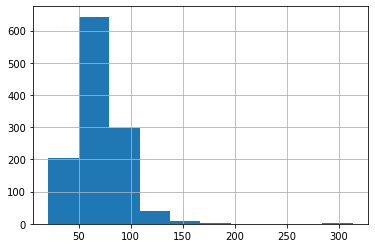

In [46]:
# Avaliando com histograma a variável fachada
df_a1.Fachada.hist()
plt.show()

In [47]:
df_a1.Fachada.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: Fachada, dtype: float64

In [48]:
# Avaliando de forma descritiva a feature fachada, decidiu-se por preencher os dados faltantes com a mediana
median_fachada = df_a1.Fachada.median
df_a1.Fachada.fillna(median_fachada, inplace=True)

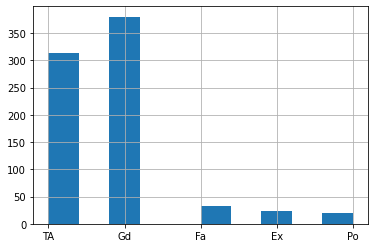

In [49]:
# Analisando a frequência de valores na variável 'QualidadeLareira'
df_a1.QualdiadeLareira.hist()
plt.show()

In [50]:
# Avaliando missings na feature lareira
df_a1.QualdiadeLareira.describe().T

count     770
unique      5
top        Gd
freq      380
Name: QualdiadeLareira, dtype: object

In [51]:
df_a1[['Lareira', 'QualdiadeLareira', ]].loc[df_a1['CarrosGaragem'] == 0].head().T

Id,40,49,79,89,90
Lareira,0,0,0,0,0
QualdiadeLareira,NaN,NaN,NaN,NaN,NaN


In [52]:
# Consultando o dicionário das features, percebe-se que a ausência dos dados na feature lareira significa que o imóvel 
# não a possui em sua estrutura. Dessa forma, serão preenchidos como SemLareira
df_a1.Lareira.fillna('Sem_lareira', inplace=True)
df_a1.QualdiadeLareira.fillna('Sem_lareira', inplace=True)


In [53]:
# Verificando a presença de missings em todo o dataset
df_a1.isnull().sum()

ClasseImovel            0
ClasseZona              0
Fachada                 0
TamanhoLote             0
Rua                     0
FormaProp               0
PlanoProp               0
Servicos                0
ConfigLote              0
InclinacaoLote          0
Bairro                  0
Estrada1                0
Estrada2                0
TipoHabitacao           0
EstiloHabitacao         0
Qualidade               0
Condicao                0
AnoConstrucao           0
AnoReforma              0
TipoTelhado             0
MaterialTelhado         0
Exterior1               0
Exterior2               0
TipoAlvenaria           0
AreaAlvenaria           0
QualidadeCobertura      0
CondicaoExterna         0
TipoFundacao            0
AlturaPorao             0
CondicaoPorao           0
ParedePorao             0
TipoAcabPorao1          0
AreaAcabPorao1          0
TipoAcabPorao2          0
AreaAcabPorao2          0
AreaInacabPorao         0
AreaPorao               0
Aquecimento             0
QualidadeAqu

### Construindo features

In [54]:
# Construção de novas variáveis. Escolheu-se por usar o valor médio entre qualidade e condição
# Usando o round teremos apenas valores inteiros
df_a1['qualidade_condicao'] = round((df_a1['Qualidade']+df_a1['Condicao'])/2)

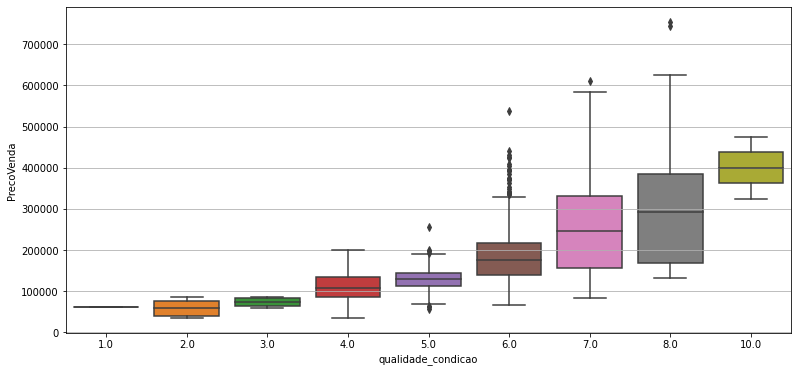

In [55]:
plt.subplots(figsize = (13,6))
plt.grid()
sns.boxplot(data = df_a1, x = 'qualidade_condicao', y = 'PrecoVenda' );

In [56]:
# Para avaliar a dimensão do espaço ofertado pelos quartos do imóvel, pode-se usar a seguinte variável
df_a1['AreaQuarto'] = df_a1['AreaConstruida']/df_a1['TotalQuartos']

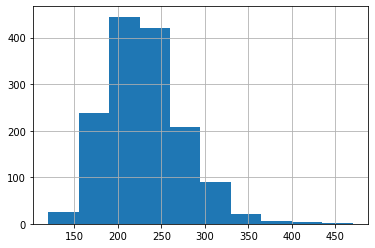

In [57]:
df_a1['AreaQuarto'].hist(histtype='stepfilled')
plt.show()

## Avaliando possíveis outliers

In [58]:
df_a1.loc[(df_a1['AreaConstruida'] > 4000) & (df_a1['PrecoVenda'] < 200000)]

,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda,qualidade_condicao,AreaQuarto
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750,8.0,425.090909
1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000,8.0,470.166667


In [59]:
df_a1.loc[(df_a1['AreaConstruida'] > 3000) & (df_a1['PrecoVenda'] > 600000)]

,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,FormaProp,PlanoProp,Servicos,ConfigLote,InclinacaoLote,Bairro,Estrada1,Estrada2,TipoHabitacao,EstiloHabitacao,Qualidade,Condicao,AnoConstrucao,AnoReforma,TipoTelhado,MaterialTelhado,Exterior1,Exterior2,TipoAlvenaria,AreaAlvenaria,QualidadeCobertura,CondicaoExterna,TipoFundacao,AlturaPorao,CondicaoPorao,ParedePorao,TipoAcabPorao1,AreaAcabPorao1,TipoAcabPorao2,AreaAcabPorao2,AreaInacabPorao,AreaPorao,Aquecimento,QualidadeAquecimento,ArCentral,InstalacaoEletrica,AreaTerreo,Area2Andar,BaixaQualiAreaAcab,AreaConstruida,BanheiroPorao,LavaboPorao,Banheiro,Lavabo,BedroomAbvGr,KitchenAbvGr,QualidadeCozinha,TotalQuartos,Funcionalidade,Lareira,QualdiadeLareira,LocalGaragem,AnoGaragem,AcabamentoGaragem,CarrosGaragem,AreaGaragem,QualidadeGaragem,CondicaoGaragem,EntradaPavimentada,AreaDeck,AreaVarandaAberta,AreaVarandaFechada,AreaVaranda3Estacoes,AreaAlpendre,AreaPiscina,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda,qualidade_condicao,AreaQuarto
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000,8.0,431.6
1170,60,RL,118.0,35760,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,Gd,Gd,PConc,Ex,TA,Gd,GLQ,1387,Unf,0,543,1930,GasA,Ex,Y,SBrkr,1831,1796,0,3627,1,0,3,1,4,1,Gd,10,Typ,1,TA,Attchd,1995.0,Fin,3,807,TA,TA,Y,361,76,0,0,0,0,0,7,2006,WD,Normal,625000,8.0,362.7
1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000,8.0,447.6


## Transformação logarítmica na variável de interesse

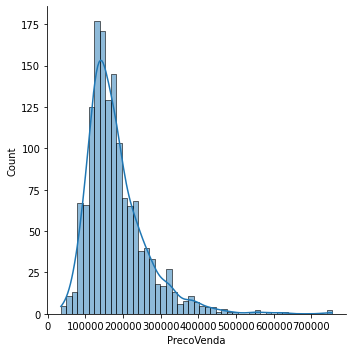

In [60]:
sns.displot(df, x="PrecoVenda", kde=True)

### Apresenta assimetria positiva fraca

In [61]:
# Usando escala logarítmica para mudar a assimetria da distribuição
df_a1["PrecoVenda_log"] = np.log(df_a1["PrecoVenda"] + 1)

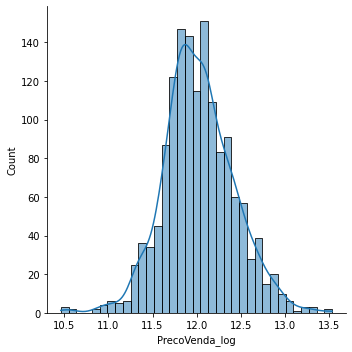

In [62]:
# Verificando a distribuição após a transformação
sns.displot(df_a1, x="PrecoVenda_log", kde=True)

### Criando um novo dataset com a feature condição de compra igual a normal

In [63]:
dados_training = pd.DataFrame()
dados_training['PrecoVenda_log'] = df_a1['PrecoVenda_log']

In [64]:
dados_training['AreaConstruida'] = df_a1['AreaConstruida']

In [65]:
dados_training['AreaQuarto'] = df_a1['AreaQuarto']

In [66]:
dados_training['AreaConstruida'] = df_a1['AreaConstruida']

In [67]:
dados_training['Qualidade'] = df_a1['Qualidade']

In [68]:
dados_training['ClasseZona'] = df_a1['ClasseZona']

In [69]:
dados_training['AnoReforma'] = df_a1['AnoReforma']

In [70]:
dados_training['CarrosGaragem'] = df_a1['CarrosGaragem']

In [71]:
dados_training['Condicao'] = df_a1['Condicao']

In [72]:
# Aplicando filtro para reter somente os imóveis com condição normal de compra
dados_training['CondVenda'] = df_a1['CondicaoVenda']
dados_training = dados_training.loc[dados_training['CondVenda'] == 'Normal'].drop(columns = 'CondVenda').reset_index(drop=True)

In [73]:
dados_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PrecoVenda_log  1198 non-null   float64
 1   AreaConstruida  1198 non-null   int64  
 2   AreaQuarto      1198 non-null   float64
 3   Qualidade       1198 non-null   int64  
 4   ClasseZona      1198 non-null   object 
 5   AnoReforma      1198 non-null   int64  
 6   CarrosGaragem   1198 non-null   int64  
 7   Condicao        1198 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 75.0+ KB


### Transformando a feature categórica com onehotencoding

In [74]:
coluna_categorica = ['ClasseZona']

dados_training = pd.get_dummies(dados_training,columns = coluna_categorica)

In [75]:
# Foi criado uma nova coluna Classe Zona_C
dados_training.head(10)

,PrecoVenda_log,AreaConstruida,AreaQuarto,Qualidade,AnoReforma,CarrosGaragem,Condicao,ClasseZona_C (all),ClasseZona_FV,ClasseZona_RH,ClasseZona_RL,ClasseZona_RM
0,12.247699,1710,213.750000,7,2003,2,5,0,0,0,1,0
1,12.109016,1262,210.333333,6,1976,2,8,0,0,0,1,0
2,12.317171,1786,297.666667,7,2002,2,5,0,0,0,1,0
3,12.429220,2198,244.222222,8,2000,3,5,0,0,0,1,0
4,11.870607,1362,272.400000,5,1995,2,5,0,0,0,1,0
5,12.634606,1694,242.000000,8,2005,2,5,0,0,0,1,0
6,12.206078,2090,298.571429,7,1973,2,6,0,0,0,1,0
7,11.678448,1077,215.400000,5,1950,1,6,0,0,0,1,0
8,11.771444,1040,208.000000,5,1965,1,5,0,0,0,1,0
9,11.877576,912,228.000000,5,1962,1,6,0,0,0,1,0


In [76]:
# Padronização das variáveis quantitativas com StandardScaler
from sklearn.preprocessing import StandardScaler
features_scale = ['PrecoVenda_log','AreaConstruida','Qualidade','CarrosGaragem','AreaQuarto','AnoReforma']
feat_quanti = dados_training[features_scale]
feat_quanti.head()

,PrecoVenda_log,AreaConstruida,Qualidade,CarrosGaragem,AreaQuarto,AnoReforma
0,12.247699,1710,7,2,213.750000,2003
1,12.109016,1262,6,2,210.333333,1976
2,12.317171,1786,7,2,297.666667,2002
3,12.429220,2198,8,3,244.222222,2000
4,11.870607,1362,5,2,272.400000,1995


In [77]:
# Fitando o transformer e acrescentando o aprendizado no dataset para o objetivo 01
scaled_features = StandardScaler().fit_transform(feat_quanti.values)
df_ob1 = pd.DataFrame(scaled_features,index=feat_quanti.index,columns=feat_quanti.columns)

In [78]:
# Passar as colunas categóricas transformadas para o novo dataframe padronizado
df_ob1['ClasseZona_C (all)'] = dados_training['ClasseZona_C (all)']
df_ob1['ClasseZona_FV'] = dados_training['ClasseZona_FV']
df_ob1['ClasseZona_RH'] = dados_training['ClasseZona_RH']
df_ob1['ClasseZona_RL'] = dados_training['ClasseZona_RL']
df_ob1['ClasseZona_RM'] = dados_training['ClasseZona_RM']

In [79]:
df_ob1.head()

,PrecoVenda_log,AreaConstruida,Qualidade,CarrosGaragem,AreaQuarto,AnoReforma,ClasseZona_C (all),ClasseZona_FV,ClasseZona_RH,ClasseZona_RL,ClasseZona_RM
0,0.661701,0.437086,0.753863,0.388232,-0.373804,0.952089,0,0,0,1,0
1,0.283530,-0.465153,-0.005068,0.388232,-0.451896,-0.379987,0,0,0,1,0
2,0.851143,0.590145,0.753863,0.388232,1.544208,0.902753,0,0,0,1,0
3,1.156687,1.419883,1.512794,1.797632,0.322674,0.804080,0,0,0,1,0
4,-0.366583,-0.263761,-0.763999,0.388232,0.966709,0.557400,0,0,0,1,0


### Instanciando a regressão linear (Objetivo 1)


In [80]:
import statsmodels.api as sm
x = dados_training.drop(columns='PrecoVenda_log')
Y = dados_training['PrecoVenda_log']
x=sm.add_constant(x)

In [81]:
regressao_linear = sm.OLS(Y,x).fit()

In [82]:
regressao_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PrecoVenda_log   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     724.3
Date:                Thu, 17 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:36:02   Log-Likelihood:                 676.18
No. Observations:                1198   AIC:                            -1330.
Df Residuals:                    1187   BIC:                            -1274.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  5.2925      0.383     13.824      0.000       4.541       6.044
AreaConstruida         0.0002   1.18e-05     18.955      0.000       0.000       0.000
AreaQuarto             0.0008      0.000      6.528      0.000       0.001       0.001
Qualidade              0.1057      0.004     23.651      0.000       0.097       0.114
AnoReforma             0.0020      0.000      8.470      0.000       0.002       0.002
CarrosGaragem          0.1067      0.007     14.765      0.000       0.092       0.121
Condicao               0.0291      0.004      7.851      0.000       0.022       0.036
ClasseZona_C (all)     0.7871      0.095      8.294      0.000       0.601       0.973
ClasseZona_FV          1.1778      0.083     14.133      0.000       1.014       1.341
ClasseZona_RH          1.0695      0.083     12.825      0.000       0.906       1.233
ClasseZona_RL          1.2303      0.078     15.710      0.000       1.077       1.384
ClasseZona_RM          1.0279      0.078     13.172      0.000       0.875       1.181
==============================================================================
Omnibus:                       41.851   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.635
Skew:                          -0.285   Prob(JB):                     7.57e-16
Kurtosis:                       4.034   Cond. No.                     3.08e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.97e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [83]:
# Identificando, em porcentagem, o impacto do aumento nas variáveis, considerando todas as outras constantes.
round((np.exp(regressao_linear.params[1:]) - 1)*100, 2)

AreaConstruida          0.02
AreaQuarto              0.08
Qualidade              11.15
AnoReforma              0.20
CarrosGaragem          11.25
Condicao                2.96
ClasseZona_C (all)    119.69
ClasseZona_FV         224.71
ClasseZona_RH         191.38
ClasseZona_RL         242.23
ClasseZona_RM         179.51
dtype: float64

### A zona RL aponta para um aumento de 242% no valor do imóvel.

#### Nesse modelo de regressão tem-se um R² ajustado de 0,858, ou seja, cerca de 86% da variabilidade está sendo explicado pelas variáveis selecionadas. O intercepto de maior impacto no preço da casa foi a zona onde ela está localizada. Também é importante lembrar que o teste Durbin-Watson ficou bem próximo de 2, apontando para independência entre as variáveis explicativas escolhidas. Por fim, o cálculo do test F apontou para a rejeição da hipótese nula, ou seja, o melhor ajuste do intercepto acontece nesse modelo e não no outro mais simples, contendo somente a média. 

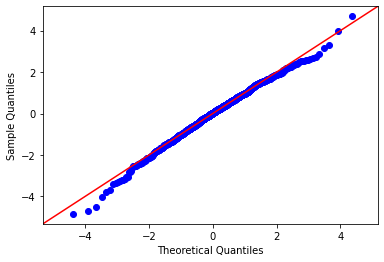

In [84]:
# Avaliando a distribuição dos resíduos do modelo 
from scipy import stats
res = regressao_linear.resid
fig = sm.qqplot(res,stats.t,distargs=(4,), line = '45', fit=True)
plt.show()

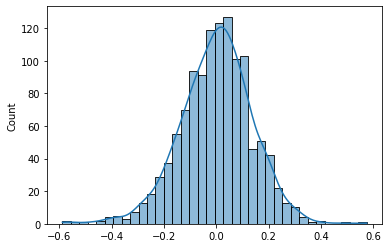

In [85]:
# Distribuição dos resíduos
sns.histplot(res, kde=True)

In [86]:
# Verificando a multicoliearidade entre as variáveis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df_ob1[['PrecoVenda_log', 'AreaConstruida', 'Qualidade',
            'CarrosGaragem', 'AreaQuarto', 'AnoReforma', 'ClasseZona_C (all)', 'ClasseZona_FV', 
            'ClasseZona_RH', 'ClasseZona_RL', 'ClasseZona_RM']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature       VIF
0       PrecoVenda_log  6.751701
1       AreaConstruida  2.779669
2            Qualidade  3.132400
3        CarrosGaragem  1.823285
4           AreaQuarto  1.873228
5           AnoReforma  1.522387
6   ClasseZona_C (all)  1.042285
7        ClasseZona_FV  1.056903
8        ClasseZona_RH  1.017601
9        ClasseZona_RL  1.058133
10       ClasseZona_RM  1.240393


#### VIF(Variance Inflation Factors) foi calculado para avaliar a multicolinearidade entre as variáveis explicativas. Para valores entre 1 e 5, considera-se que a correlação é nula ou fraca. 

### Avaliando a linearidade e a homocedasticidade do modelo

In [87]:
modelo_y_ajustado = regressao_linear.fittedvalues

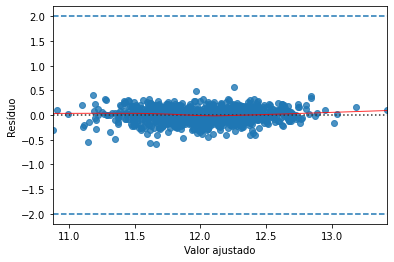

In [88]:
sns.residplot(modelo_y_ajustado, res, 
                          lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.axhline(y = 2, linestyle='dashed')
plt.axhline(y = -2, linestyle='dashed')
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

### Regressão via Random Forest (Objetivo 2)

In [89]:
from typing import List, Tuple
# Importando bibliotecas de modelagem
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
# Feature importance
from sklearn.inspection import permutation_importance

# Categorical encoders
from category_encoders.target_encoder import TargetEncoder

# Stats libs
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import os

from matplotlib.dates import DateFormatter

In [90]:
df['PrecoVenda_log'] = np.log(df['PrecoVenda'].values)

In [91]:
df1 = df.copy()

In [92]:
df1.drop(labels=['Outros', 'QualidadeCerca', 'QualidadePiscina', 'Beco', 'PrecoVenda'], axis=1, index=None, 
           columns=None, level=None, inplace=True, errors='ignore')

In [93]:
# Função para dividir os dados em teste, treino e validação
def train_test_valid_split(
    df: pd.DataFrame,
    features: list,
    target: str,
    test_size: float,
    valid_size: float,
    random_state: int,
) -> Tuple[np.array, np.array, np.array, np.array, np.array, np.array]:
    """Splits dataframe in training, testing and validation sets"""

    # The first train/test split
    (X_train, X_test, y_train, y_test) = train_test_split(
        df[features],
        df[target],
        test_size=test_size,
        random_state=random_state,
    )

    # The second train/test split
    (X_test, X_val, y_test, y_val) = train_test_split(
        X_test, y_test, test_size=valid_size, random_state=random_state
    )

    return X_train, X_test, X_val, y_train, y_test, y_val

In [94]:
# Função de métricas
def metrics_report(y, y_pred, dataset_name='valid'):
  mean_y = np.mean(y)
  mean_pred = np.mean(y_pred)

  rmse = round(math.sqrt(mean_squared_error(y, y_pred)), 2)
  mae = mean_absolute_error(y, y_pred)
  r2 = r2_score(y, y_pred)
  mape = mean_absolute_percentage_error(y, y_pred)
  
  report = pd.DataFrame({
    'metric': ['RMSE', 'MAE', 'R^2', 'MAPE', 'Avg. target', 'Avg. Prediction'],
    dataset_name: [rmse, mae, r2, mape, mean_y, mean_pred]
  })

  report[dataset_name] = report[dataset_name].round(6)
  return report

In [95]:
var_y = 'PrecoVenda_log'

In [96]:
# Features numericas
num_features = df1.select_dtypes(include=['int', 'float']).columns.tolist()
num_features.remove('ClasseImovel')
num_features.remove('PrecoVenda_log')
print(f'numerical features({len(num_features)}): {num_features}')

# Features categoricas
cat_features = df1.select_dtypes(exclude=['int', 'float']).columns.tolist()
cat_features.append('ClasseImovel')
df1[cat_features] = df1[cat_features].astype("category")
print(f'categorical features({len(cat_features)}): {cat_features}')


numerical features(35): ['Fachada', 'TamanhoLote', 'Qualidade', 'Condicao', 'AnoConstrucao', 'AnoReforma', 'AreaAlvenaria', 'AreaAcabPorao1', 'AreaAcabPorao2', 'AreaInacabPorao', 'AreaPorao', 'AreaTerreo', 'Area2Andar', 'BaixaQualiAreaAcab', 'AreaConstruida', 'BanheiroPorao', 'LavaboPorao', 'Banheiro', 'Lavabo', 'BedroomAbvGr', 'KitchenAbvGr', 'TotalQuartos', 'Lareira', 'AnoGaragem', 'CarrosGaragem', 'AreaGaragem', 'AreaDeck', 'AreaVarandaAberta', 'AreaVarandaFechada', 'AreaVaranda3Estacoes', 'AreaAlpendre', 'AreaPiscina', 'ValorOutros', 'MesVenda', 'AnoVenda']
categorical features(40): ['ClasseZona', 'Rua', 'FormaProp', 'PlanoProp', 'Servicos', 'ConfigLote', 'InclinacaoLote', 'Bairro', 'Estrada1', 'Estrada2', 'TipoHabitacao', 'EstiloHabitacao', 'TipoTelhado', 'MaterialTelhado', 'Exterior1', 'Exterior2', 'TipoAlvenaria', 'QualidadeCobertura', 'CondicaoExterna', 'TipoFundacao', 'AlturaPorao', 'CondicaoPorao', 'ParedePorao', 'TipoAcabPorao1', 'TipoAcabPorao2', 'Aquecimento', 'QualidadeAq

In [97]:
features = num_features + cat_features

In [98]:
(
  X_train, X_test, 
  X_val, y_train, 
  y_test, y_val
) = train_test_valid_split(df1, features=features, target=var_y, test_size=0.3, valid_size=0.5, random_state=42)

print('X Train shape', X_train.shape)
print('X Val shape', X_val.shape)
print('X Test shape', X_test.shape)

X Train shape (1022, 75)
X Val shape (219, 75)
X Test shape (219, 75)


In [99]:
# Pré processamento usando simple imputer para preencher com a moda nos faltantes para a variável categórica
cat_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])


In [100]:
# Pré processamento para variáveis categóricas
cat_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_val[cat_features] = cat_imputer.transform(X_val[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])


In [101]:
# Pré processamento para variáveis numéricas(missing imputer)
num_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_val[num_features] = num_imputer.transform(X_val[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

In [102]:
# Transformação nas variáveis categóricas (categorical encoders)
target_encoder = TargetEncoder()
X_train[cat_features] = target_encoder.fit_transform(X_train[cat_features], y_train)
X_val[cat_features] = target_encoder.transform(X_val[cat_features])
X_test[cat_features] = target_encoder.transform(X_test[cat_features])

In [103]:
# Treinando o modelo baseline
from sklearn.ensemble import RandomForestRegressor
import math
rf_baseline = RandomForestRegressor(random_state=42)
# Treino
rf_baseline.fit(X_train, y_train)

y_val_baseline_pred = rf_baseline.predict(X_val)
baseline_report = metrics_report(y_val, y_val_baseline_pred, 'validation')
baseline_report

,metric,validation
0,RMSE,0.120000
1,MAE,0.084005
2,R^2,0.911412
3,MAPE,0.007008
4,Avg. target,11.979500
5,Avg. Prediction,11.969050


# Busca  pelos melhores hiperparâmetros do Random Forest

In [104]:

for n_estimators in [10, 30, 50, 70, 100, 150, 200]:
  print(f'Random forest, with n_estimators {n_estimators}')
  rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with n_estimators 10
rmse: 0.12651964589957712

Random forest, with n_estimators 30
rmse: 0.12096662001155853

Random forest, with n_estimators 50
rmse: 0.1195598016259593

Random forest, with n_estimators 70
rmse: 0.11863850774894952

Random forest, with n_estimators 100
rmse: 0.11960591459417022

Random forest, with n_estimators 150
rmse: 0.12038422306837199

Random forest, with n_estimators 200
rmse: 0.12066939977047494



In [105]:
for max_features in ['sqrt', 0.1, 0.2, 0.3, 0.4, 0.6]:
  print(f'Random forest, with max_features {max_features}')
  rf_model = RandomForestRegressor(n_estimators=150, max_features=max_features, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with max_features sqrt
rmse: 0.1252024879497036

Random forest, with max_features 0.1
rmse: 0.12658338836930857

Random forest, with max_features 0.2
rmse: 0.12175552912480887

Random forest, with max_features 0.3
rmse: 0.12141870947942526

Random forest, with max_features 0.4
rmse: 0.11985856671869785

Random forest, with max_features 0.6
rmse: 0.12073032804510453



In [106]:
for min_samples_leaf in list(range(1,6)):
  print(f'Random forest, with min_samples_leaf {min_samples_leaf}')
  rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= min_samples_leaf, random_state=42)
  rf_model.fit(X_train, y_train)
  y_val_pred = rf_model.predict(X_val)
  rmse = math.sqrt(mean_squared_error(y_val, y_val_pred))
  print(f'rmse: {rmse}\n')

Random forest, with min_samples_leaf 1
rmse: 0.12141870947942526

Random forest, with min_samples_leaf 2
rmse: 0.12281915618874371

Random forest, with min_samples_leaf 3
rmse: 0.12409716727881535

Random forest, with min_samples_leaf 4
rmse: 0.12497052529198094

Random forest, with min_samples_leaf 5
rmse: 0.1282764473497069



In [107]:
rf_model = RandomForestRegressor(n_estimators=70, max_features=0.4, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train, y_train)
y_val_pred = rf_model.predict(X_val)
metrics_report(y_val, y_val_pred, 'validation')

,metric,validation
0,RMSE,0.120000
1,MAE,0.083993
2,R^2,0.905502
3,MAPE,0.007005
4,Avg. target,11.979500
5,Avg. Prediction,11.972312


In [108]:
# Buscando as melhores features 
print('Running permutation feature importance')
permutation_result = permutation_importance(rf_model, X_val, y_val, n_repeats=5, random_state=42)

Running permutation feature importance


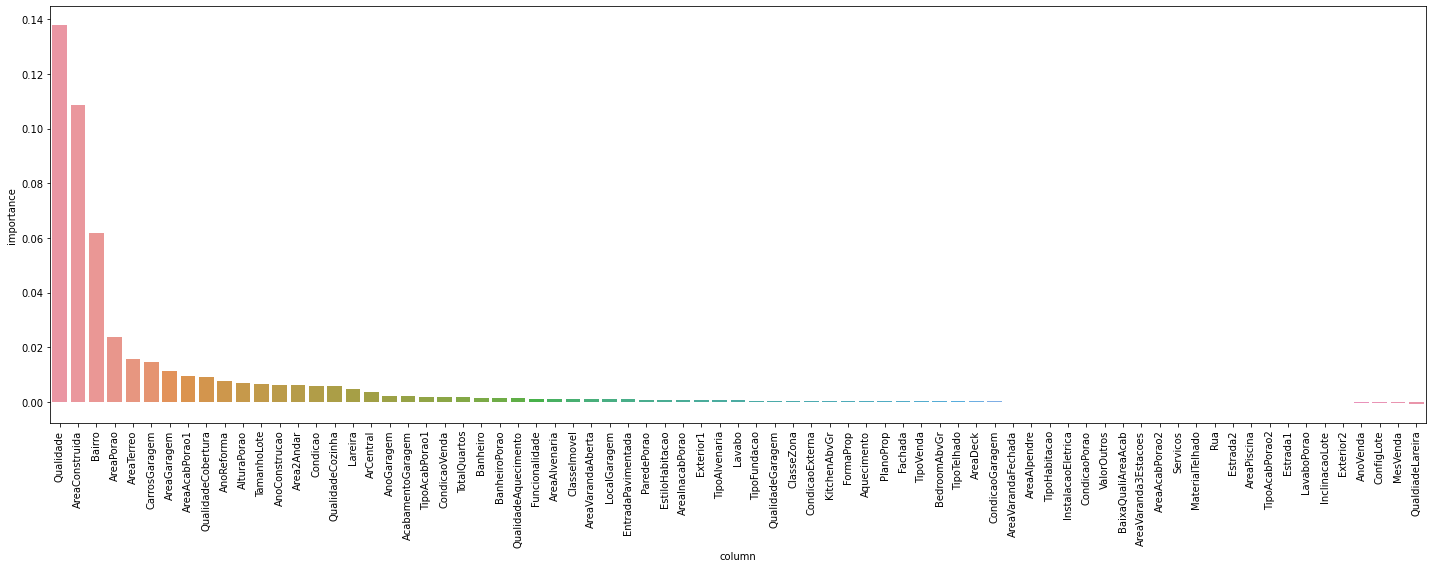

In [109]:
# Plotando gráfico crescente de importância das features 
importances = pd.DataFrame({'column' : X_val.columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(20,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()

In [110]:

best_features = importances.head(25).column.tolist()
print(best_features)

['Qualidade', 'AreaConstruida', 'Bairro', 'AreaPorao', 'AreaTerreo', 'CarrosGaragem', 'AreaGaragem', 'AreaAcabPorao1', 'QualidadeCobertura', 'AnoReforma', 'AlturaPorao', 'TamanhoLote', 'AnoConstrucao', 'Area2Andar', 'Condicao', 'QualidadeCozinha', 'Lareira', 'ArCentral', 'AnoGaragem', 'AcabamentoGaragem', 'TipoAcabPorao1', 'CondicaoVenda', 'TotalQuartos', 'Banheiro', 'BanheiroPorao']


In [111]:
# Fitando o modelo final da regressão RandomForest
rf_model = RandomForestRegressor(n_estimators=150, max_features=0.3, min_samples_leaf= 1, random_state=42)
rf_model.fit(X_train[best_features], y_train)

# Coputando as predições
y_train_pred = rf_model.predict(X_train[best_features])
y_val_pred = rf_model.predict(X_val[best_features])
y_test_pred = rf_model.predict(X_test[best_features])

# Computando as métricas de perfomance para treino, teste e valição
train_report = metrics_report(y_train, y_train_pred, 'train')
val_report = metrics_report(y_val, y_val_pred, 'validation')
test_report = metrics_report(y_test, y_test_pred, 'test')

final_report = pd.concat([train_report, val_report[['validation']],  test_report[['test']]], axis=1)

print(f'Baseline report (total features: {len(features)})')
print(baseline_report)
print('')
print(f'Final report (total features: {len(best_features)})')
print(final_report)

Baseline report (total features: 75)
            metric  validation
0             RMSE    0.120000
1              MAE    0.084005
2              R^2    0.911412
3             MAPE    0.007008
4      Avg. target   11.979500
5  Avg. Prediction   11.969050

Final report (total features: 25)
            metric      train  validation       test
0             RMSE   0.050000    0.120000   0.140000
1              MAE   0.033780    0.085133   0.089324
2              R^2   0.983178    0.910680   0.883389
3             MAPE   0.002822    0.007119   0.007550
4      Avg. target  12.028893   11.979500  12.046006
5  Avg. Prediction  12.027499   11.974899  12.047204


Running permutation feature importance with the final model on the held-out testing set


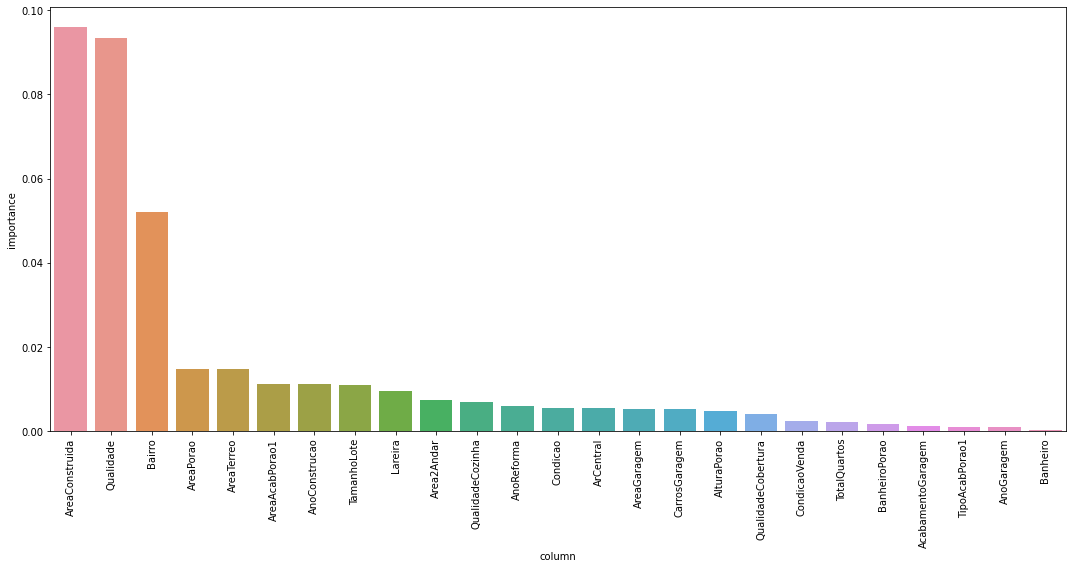

In [112]:
# Verificando a importância das features no modelo final 
print('Running permutation feature importance with the final model on the held-out testing set')
permutation_result = permutation_importance(rf_model, X_test[best_features], y_test, n_repeats=5, random_state=42)

importances = pd.DataFrame({'column' : X_test[best_features].columns, 'importance': permutation_result.importances_mean})
importances.sort_values(by='importance', ascending=False, inplace=True)

fig, axs = plt.subplots(figsize=(15,8))
ax = sns.barplot(x='column', y="importance", data=importances)
plt.xticks(rotation=90)
plt.tight_layout()